In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv("../data/AdSmartABdata.csv")

In [3]:
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [5]:
# the date column needs to be converted in datetime
data['date'] = pd.to_datetime(data['date'])

In [6]:
data.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

# Count of users shown the ad per exposed/control group

The number of users shown the ad for both groups must be equal to avoid bias conclusions due to sampling error. According to the chart below we can see that control ad had been shown to 65 more online users compared to the exposed group.

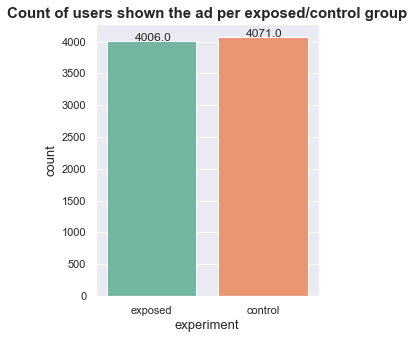

In [104]:
plt.figure(figsize = (4,5))
sns.set(style = 'darkgrid')
ax = sns.countplot(x ='experiment', data = data, palette='Set2')
ax.set_title('Count of users shown the ad per exposed/control group', fontsize=15, fontweight='bold')
ax.set_xlabel('experiment', fontsize=13)
ax.set_ylabel('count', fontsize=13)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()))
        

# The number of user shown the ad for both groups must be equal to avoid bias conclusions
# Here we can see that control ad had been shown to 65 more online users compared to the exposed group.

# Count of users who participated in BIO survey per each group

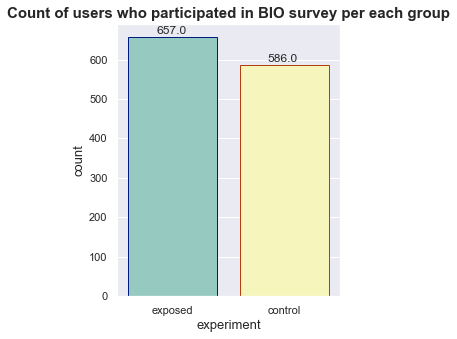

In [106]:
plt.figure(figsize=(4,5))
sns.set(style = 'darkgrid')
ax = sns.countplot( x= 'experiment', data = data[~((data['yes']==0) & (data['no']==0))], palette = 'Set3', edgecolor=sns.color_palette("dark", 10))
ax.set_title('Count of users who participated in BIO survey per each group', fontsize=15, fontweight='bold')
ax.set_xlabel('experiment', fontsize=13)
ax.set_ylabel('count', fontsize=13)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+7))

# Count of users who didn't participate in BIO survey per each group

From the observation on the graph below many users saw the ad but didn't participate in answering the bio survey

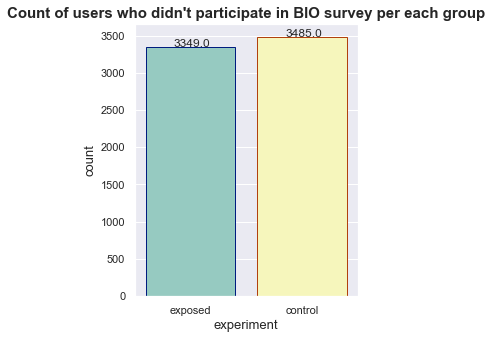

In [105]:
plt.figure(figsize=(4,5))
sns.set(style = 'darkgrid')
ax = sns.countplot( x= 'experiment', data = data[((data['yes']==0) & (data['no']==0))], palette = 'Set3', edgecolor=sns.color_palette("dark", 10))
ax.set_title("Count of users who didn't participate in BIO survey per each group", fontsize=15, fontweight='bold')
ax.set_xlabel('experiment', fontsize=13)
ax.set_ylabel('count', fontsize=13)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+7))

# Count of users in each group per ad campain hours

We can observe that the ad campaign rose at 15pm and during that time the control ad was advertised to many online users than the exposed ad. In contrast, the rest the hours the exposed ad was advertised mostly than the control ad.

Text(0, 0.5, 'count')

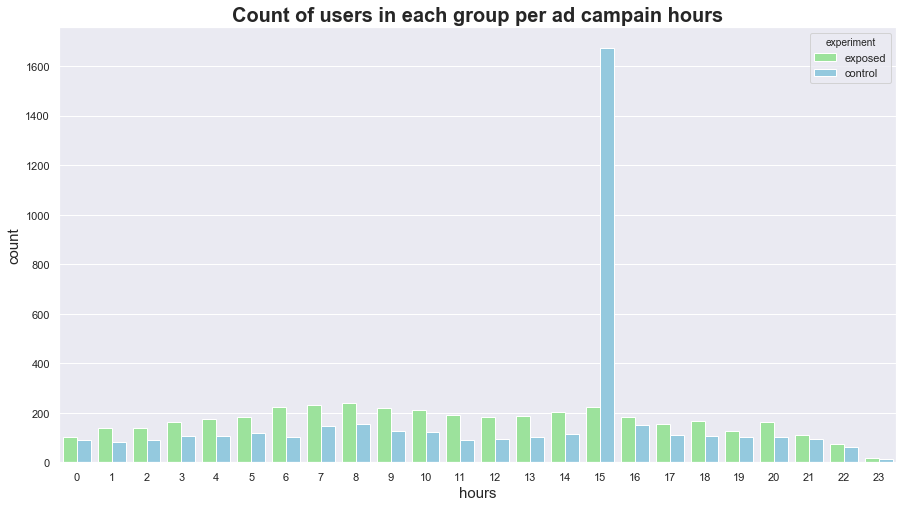

In [127]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
ax = sns.countplot(x = 'hour',data = data, hue = 'experiment', palette=["lightgreen", "skyblue"])
ax.set_title("Count of users in each group per ad campain hours", fontsize=20, fontweight='bold')
ax.set_xlabel('hours', fontsize=15)
ax.set_ylabel('count', fontsize=15)

# Count of users in each group per ad campain days

The control ad campaign rose was advertised more to many online users than the exposed ad on the first day of the campaign. In contrast, the rest the days the exposed ad was advertised mostly than the control ad.

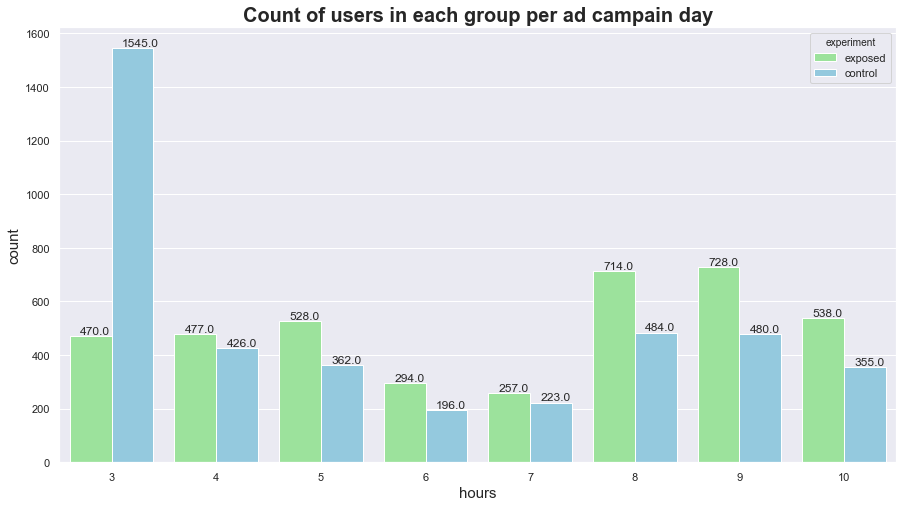

In [125]:
data['day'] = data['date'].dt.day
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
ax = sns.countplot(x = 'day',data = data, hue = 'experiment', palette=["lightgreen", "skyblue"])
ax.set_title("Count of users in each group per ad campain day", fontsize=20, fontweight='bold')
ax.set_xlabel('hours', fontsize=15)
ax.set_ylabel('count', fontsize=15)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+7))

# Count of users in each group who partipated in BIO per ad campain daily

Text(0, 0.5, 'count')

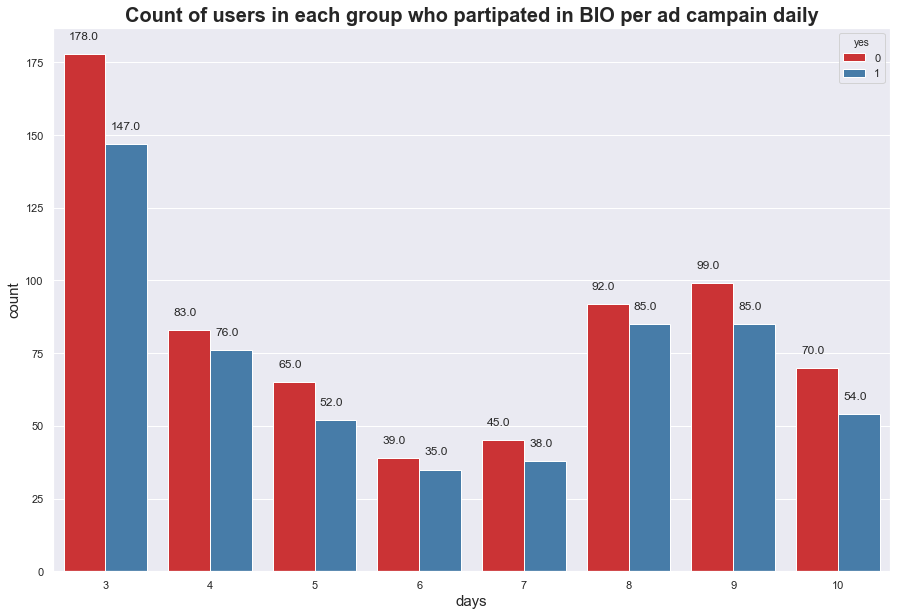

In [137]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="day", data = data[~((data['yes']==0) & (data['no']==0))], hue='yes', palette='Set1')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+5))
plt.title("Number of users that participated on a daily basis", fontsize=18)
ax.set_title("Count of users in each group who partipated in BIO per ad campain daily", fontsize=20, fontweight='bold')
ax.set_xlabel('days', fontsize=15)
ax.set_ylabel('count', fontsize=15)

# Count of users in each group who partipated in BIO per ad campain hourly

Text(0, 0.5, 'count')

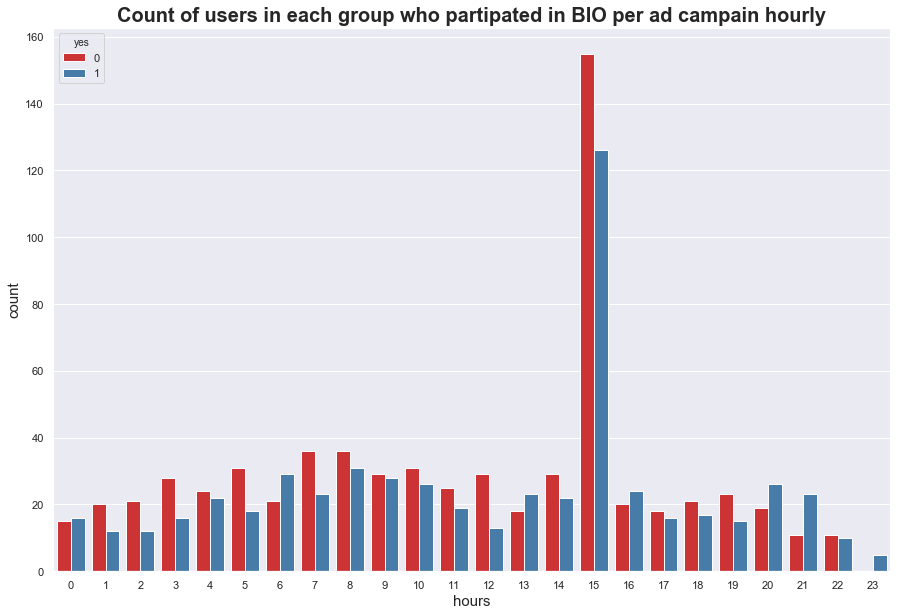

In [139]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="hour", data = data[~((data['yes']==0) & (data['no']==0))], hue='yes',  palette='Set1')
plt.title("Number of users that participated on a daily basis", fontsize=18)
ax.set_title("Count of users in each group who partipated in BIO per ad campain hourly", fontsize=20, fontweight='bold')
ax.set_xlabel('hours', fontsize=15)
ax.set_ylabel('count', fontsize=15)

In [7]:
# Dividing the datasets according to the exposed/control group
users_c = data[data['experiment']=='control']
users_e = data[data['experiment']=='exposed']

In [8]:
users_c_os = users_c['platform_os'].nunique()
users_e_os = users_e['platform_os'].nunique()

users_c_device = users_c['device_make'].nunique()
users_e_device = users_e['device_make'].nunique()

users_c_browser = users_c['browser'].nunique()
users_e_browser = users_e['browser'].nunique()

print('number of unique platform os in control group:', users_c_os)
print('number of unique platform os in exposed group:', users_e_os)
print('number of unique device make in control group:', users_c_device)
print('number of unique device make in exposed group:', users_e_device)
print('number of unique browser in control group:', users_c_browser)
print('number of unique browser in exposed group:', users_e_browser)

number of unique platform os in control group: 2
number of unique platform os in exposed group: 3
number of unique device make in control group: 169
number of unique device make in exposed group: 218
number of unique browser in control group: 12
number of unique browser in exposed group: 12


Text(0.5, 1.0, 'Number of users per platform os for each group')

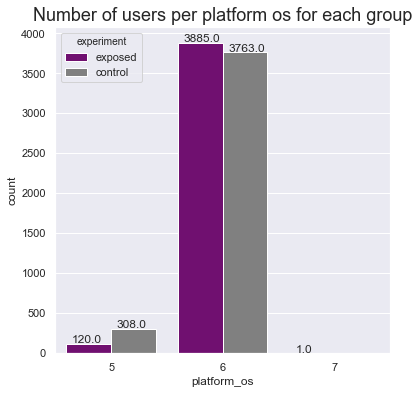

In [16]:
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="platform_os", hue = "experiment", data = data, palette=["purple", "gray"])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+5))
plt.title("Number of users per platform os for each group", fontsize=18)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

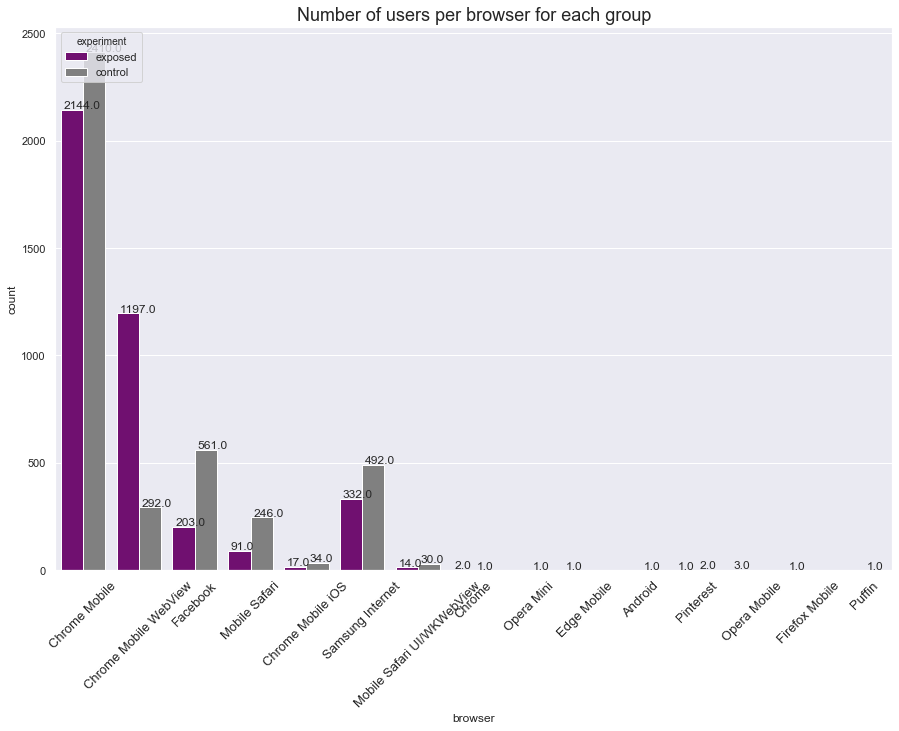

In [18]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="browser", hue = "experiment", data = data, palette=["purple", "gray"])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+5))
plt.title("Number of users per browser for each group", fontsize=18)
plt.xticks(rotation=45, fontsize=13)

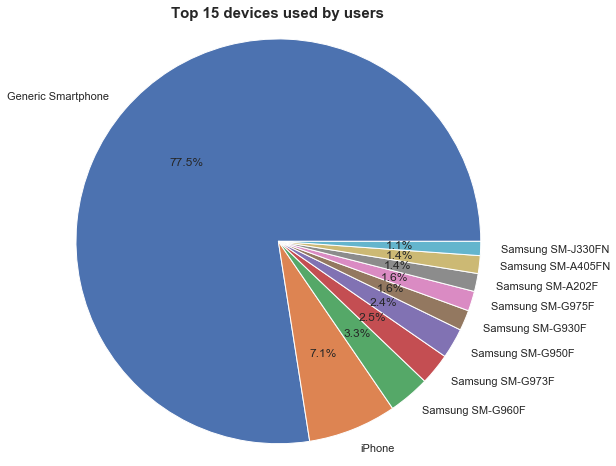

In [135]:
fig, ax = plt.subplots(1,1, figsize=(8, 8))
top_10_devices= data['device_make'].value_counts().head(10)
ax.pie(top_10_devices.values, labels=top_10_devices.index, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Top 15 devices used by users', fontsize=15, fontweight='bold')
plt.show()